In [73]:
import pandas as pd

In [109]:
inflation = pd.read_csv('inflation.csv')
inflation = inflation.astype({'Year':'int'})
inflation = inflation.drop(['HALF1', 'HALF2'], axis=1)
inflation

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2013,1.9,2.0,1.9,1.7,1.7,1.6,1.7,1.8,1.7,1.7,1.7,1.7
1,2014,1.6,1.6,1.7,1.8,2.0,1.9,1.9,1.7,1.7,1.8,1.7,1.6
2,2015,1.6,1.7,1.8,1.8,1.7,1.8,1.8,1.8,1.9,1.9,2.0,2.1
3,2016,2.2,2.3,2.2,2.1,2.2,2.2,2.2,2.3,2.2,2.1,2.1,2.2
4,2017,2.3,2.2,2.0,1.9,1.7,1.7,1.7,1.7,1.7,1.8,1.7,1.8
5,2018,1.8,1.8,2.1,2.1,2.2,2.3,2.4,2.2,2.2,2.1,2.2,2.2
6,2019,2.2,2.1,2.0,2.1,2.0,2.1,2.2,2.4,2.4,2.3,2.3,2.3
7,2020,2.3,2.4,2.1,1.4,1.2,1.2,1.6,1.7,1.7,1.6,1.6,1.6
8,2021,1.4,1.3,1.6,3.0,3.8,4.5,4.3,4.0,4.0,4.6,4.9,5.5
9,2022,6.0,6.4,6.5,6.2,6.0,5.9,5.9,6.3,6.6,6.3,6.0,5.7


In [110]:
# Create dictionary to map month names to numbers
months = {
    'Jan': 1, 
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Melting the DataFrame to combine month columns into 'Month' and 'Value' columns
inflation = pd.melt(inflation, id_vars=['Year'], var_name='Month', value_name='INFLATION')

# Creating the 'DATE' column by combining 'YEAR', 'Month', and '01'
inflation['DATE'] = pd.to_datetime(inflation['Year'].astype(str) + '-' + inflation['Month'] + '-01')

# Dropping the 'YEAR' and 'Month' columns if not needed anymore
inflation.drop(columns=['Year', 'Month'], inplace=True)

inflation.dropna(inplace=True)

inflation.sort_values(by=['DATE'], inplace=True)

inflation['DATE'] = pd.to_datetime(inflation['DATE'], format='%Y-%m-%d')

inf = inflation.pop('INFLATION')
inflation['INFLATION'] = inf

inflation.sort_values(by=['DATE'], inplace=True)
inflation.reset_index(drop=True, inplace=True)

inflation.head(10)

,DATE,INFLATION
0,2013-01-01,1.9
1,2013-02-01,2.0
2,2013-03-01,1.9
3,2013-04-01,1.7
4,2013-05-01,1.7
5,2013-06-01,1.6
6,2013-07-01,1.7
7,2013-08-01,1.8
8,2013-09-01,1.7
9,2013-10-01,1.7


In [111]:
cpi = pd.read_csv('PCEPILFE.csv')
cpi['PCEPILFE'] = cpi['PCEPILFE'] - 100.00
cpi['DATE'] = pd.to_datetime(cpi['DATE'])
# cpi.set_index('DATE', inplace=True)
# cpi.sort_values(by=['DATE'], inplace=True)
cpi.sort_values(by=['DATE'], inplace=True)
cpi.reset_index(drop=True, inplace=True)
cpi.head(10)

,DATE,PCEPILFE
0,2013-01-01,0.871
1,2013-02-01,0.992
2,2013-03-01,1.085
3,2013-04-01,1.163
4,2013-05-01,1.272
5,2013-06-01,1.438
6,2013-07-01,1.567
7,2013-08-01,1.685
8,2013-09-01,1.799
9,2013-10-01,2.015


In [112]:
unrate = pd.read_csv('UNRATE.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate = unrate[unrate['DATE'] >= '2013-01-01']
unrate.sort_values(by=['DATE'], inplace=True)
unrate.reset_index(drop=True, inplace=True)
unrate.head(10)

,DATE,UNRATE
0,2013-01-01,8.0
1,2013-02-01,7.7
2,2013-03-01,7.5
3,2013-04-01,7.6
4,2013-05-01,7.5
5,2013-06-01,7.5
6,2013-07-01,7.3
7,2013-08-01,7.2
8,2013-09-01,7.2
9,2013-10-01,7.2


In [113]:
import requests
import json

In [114]:
headers = {'Content-type': 'application/json'}
start_date = '2013-01-01'
end_date = '2023-08-15'
search_type='rate'
data = {"startDate":start_date, "endDate":end_date, 'type':search_type}
res = requests.get('https://markets.newyorkfed.org/api/rates/unsecured/effr/search.json', params=data, headers=headers)

In [120]:
from datetime import datetime
json_data = res.json()
effr = pd.DataFrame(columns = ["DATE","EFFR","TARGET_RATE_FROM","TARGET_RATE_TO"])
for r in json_data['refRates']:
    effectiveDate = r['effectiveDate']
    if datetime.strptime(effectiveDate, '%Y-%m-%d').day in [1, 2, 3]:
        percentRate = r['percentRate']
        targetRateFrom = r['targetRateFrom']
        targetRateTo = r['targetRateTo']
        effr.loc[len(effr.index)] = [effectiveDate, percentRate, targetRateFrom, targetRateTo]

effr['DATE'] = pd.to_datetime(effr['DATE'], format='%Y-%m-%d')
#effr.set_index('DATE', inplace=True)
effr.sort_values(by=['DATE'], inplace=True)
effr.reset_index(drop=True, inplace=True)
effr.head(n=10)

,DATE,EFFR,TARGET_RATE_FROM,TARGET_RATE_TO
0,2013-01-02,0.17,0.0,0.25
1,2013-01-03,0.17,0.0,0.25
2,2013-02-01,0.14,0.0,0.25
3,2013-03-01,0.14,0.0,0.25
4,2013-04-01,0.16,0.0,0.25
5,2013-04-02,0.15,0.0,0.25
6,2013-04-03,0.14,0.0,0.25
7,2013-05-01,0.14,0.0,0.25
8,2013-05-02,0.15,0.0,0.25
9,2013-05-03,0.14,0.0,0.25


In [121]:
effr_quarterly = effr.loc[effr['DATE'].dt.month.isin([3, 6, 9, 12])]
effr_quarterly = effr_quarterly.sort_values(by=['DATE'])
effr_quarterly = effr_quarterly.reset_index(drop=True)
effr_quarterly.head()

,DATE,EFFR,TARGET_RATE_FROM,TARGET_RATE_TO
0,2013-03-01,0.14,0.0,0.25
1,2013-06-03,0.10,0.0,0.25
2,2013-09-03,0.09,0.0,0.25
3,2013-12-02,0.09,0.0,0.25
4,2013-12-03,0.09,0.0,0.25


In [122]:
merged = unrate.merge(effr, on='DATE')
merged = merged.merge(inflation, on='DATE')
merged = merged.drop(['TARGET_RATE_FROM', 'TARGET_RATE_TO'], axis=1)

unrate_col = merged.pop('UNRATE')
effr_col = merged.pop('EFFR')

merged['UNRATE'] = unrate_col
merged['EFFR'] = effr_col

merged.dropna(inplace=True)
merged.head()

,DATE,INFLATION,UNRATE,EFFR
0,2013-02-01,2.0,7.7,0.14
1,2013-03-01,1.9,7.5,0.14
2,2013-04-01,1.7,7.6,0.16
3,2013-05-01,1.7,7.5,0.14
4,2013-07-01,1.7,7.3,0.10


In [123]:
merged2 = pd.melt(merged, id_vars=['DATE'], var_name=['SIGNAL'], value_name='VALUE', ignore_index = False)
merged2.sort_values(by=['DATE'], inplace=True)
merged2.reset_index(drop=True, inplace=True)
merged2

,DATE,SIGNAL,VALUE
0,2013-02-01,INFLATION,2.00
1,2013-02-01,UNRATE,7.70
2,2013-02-01,EFFR,0.14
3,2013-03-01,INFLATION,1.90
4,2013-03-01,UNRATE,7.50
...,...,...,...
241,2023-05-01,INFLATION,5.30
242,2023-05-01,UNRATE,3.70
243,2023-06-01,UNRATE,3.60
244,2023-06-01,INFLATION,4.80


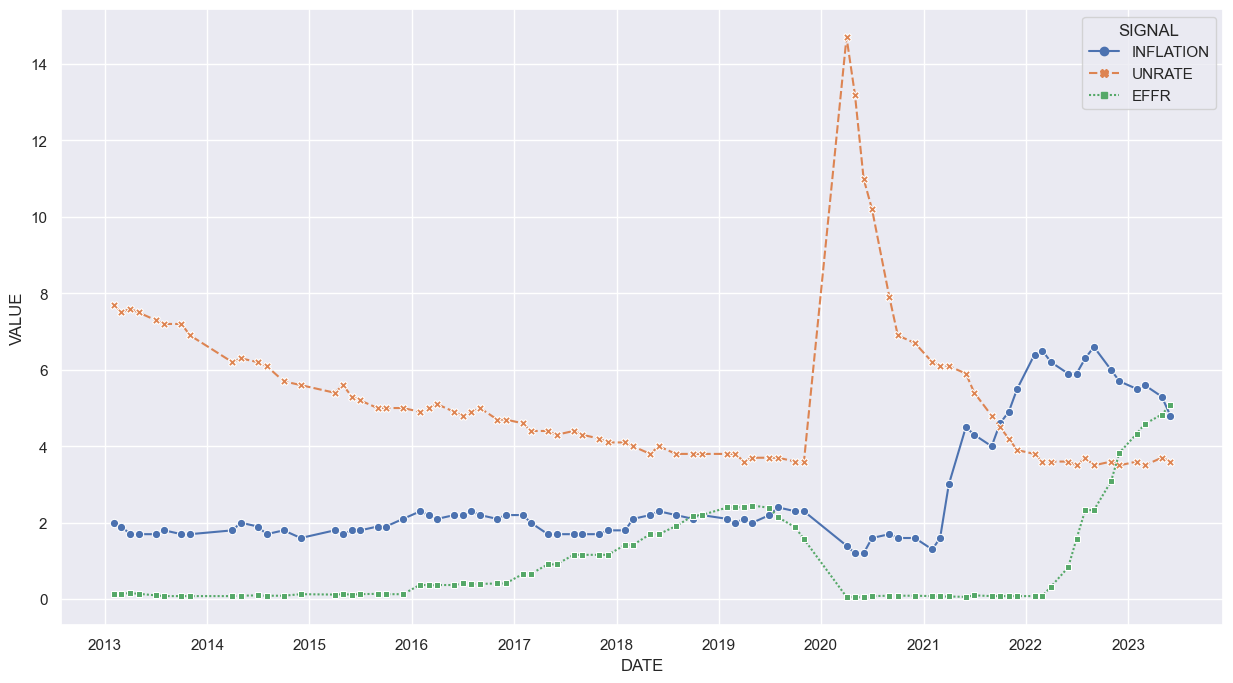

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

sns.set(rc={'figure.figsize':(15 , 8)})

sns.lineplot(data=merged2, x='DATE', y='VALUE', hue='SIGNAL', style='SIGNAL', markers=True, dashes=True)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

<Axes: xlabel='EFFR', ylabel='INFLATION'>

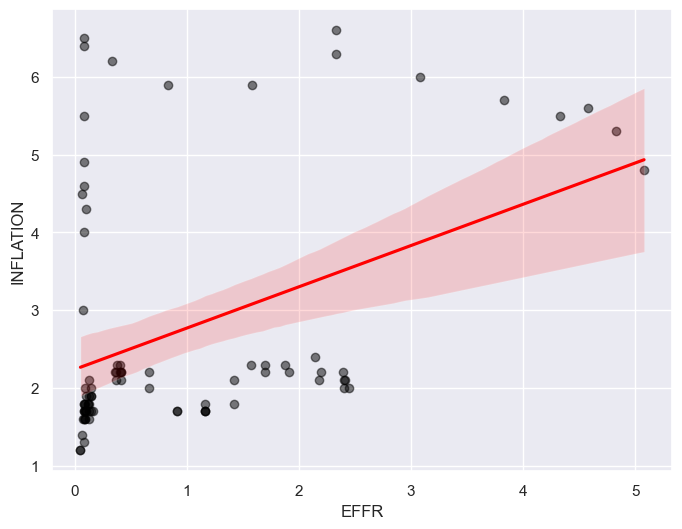

In [160]:
fig = plt.figure(figsize = (8, 6))
sns.regplot(x = merged['EFFR'], y = merged['INFLATION'],
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})

In [161]:
# import statsmodels.api as sm

In [162]:
# sm.tsa.stattools.ccf(merged['EFFR'], merged['INFLATION'], adjusted=False)

array([ 0.41398434,  0.4597452 ,  0.49673211,  0.52647188,  0.55679079,
        0.57691692,  0.58144961,  0.56630388,  0.55101611,  0.53584579,
        0.51043421,  0.45906238,  0.38179322,  0.29907907,  0.23414741,
        0.17457053,  0.11044633,  0.05470761, -0.01438645, -0.09338913,
       -0.1323597 , -0.13320778, -0.12539455, -0.12907958, -0.1292801 ,
       -0.1296587 , -0.12622175, -0.11199403, -0.09628854, -0.08418608,
       -0.09483854, -0.10423308, -0.11613507, -0.11902158, -0.11622317,
       -0.11582646, -0.11332931, -0.11390943, -0.11863758, -0.12178899,
       -0.12705962, -0.13560592, -0.13920894, -0.13906476, -0.12950816,
       -0.11654547, -0.09653235, -0.0739707 , -0.05170663, -0.02857905,
       -0.00476175,  0.00998095,  0.01617483,  0.01818746,  0.01389214,
        0.00638506, -0.00482546, -0.01549205, -0.02798409, -0.03928366,
       -0.05416143, -0.07307124, -0.08609248, -0.09437433, -0.10207682,
       -0.10796126, -0.11440895, -0.11733479, -0.12268667, -0.12

In [163]:
# # Calculate the cross-correlation for lags ranging from 1 to 24 months
# cross_corr = [merged['EFFR'].corr(merged['INFLATION'].shift(i)) for i in range(1, 18)]

# # Print the cross-correlation values
# print(cross_corr)
# print(len(cross_corr))

[0.46600352289628794, 0.5140616483761506, 0.5597102693962414, 0.6085651486931274, 0.6524791443891607, 0.6874460455772403, 0.7157208177738047, 0.7449316262934151, 0.7723451499299193, 0.7923420967776169, 0.7901886914781487, 0.7659481964794072, 0.7371570418358889, 0.7027588305270273, 0.6483320818748768, 0.5561206573144563, 0.44031759117139074]
17


In [186]:
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_ielts = ccf_values(merged['EFFR'], merged['INFLATION'])
ccf_ielts

array([-1.06071358e-02, -2.35530442e-02, -3.82504319e-02, -5.29676909e-02,
       -6.91562111e-02, -8.70027527e-02, -1.07964139e-01, -1.27368103e-01,
       -1.44780811e-01, -1.62234814e-01, -1.81274107e-01, -2.01713636e-01,
       -2.21082436e-01, -2.35869711e-01, -2.47539424e-01, -2.57767606e-01,
       -2.64513555e-01, -2.72399238e-01, -2.80942385e-01, -2.81610397e-01,
       -2.72094307e-01, -2.60642694e-01, -2.49695785e-01, -2.38214443e-01,
       -2.26304545e-01, -2.13689601e-01, -1.98105277e-01, -1.83178417e-01,
       -1.70006608e-01, -1.58006203e-01, -1.44496812e-01, -1.27949112e-01,
       -1.10507742e-01, -8.95960924e-02, -6.87760380e-02, -4.61227676e-02,
       -2.51769643e-02, -4.23067808e-04,  2.58873972e-02,  5.41062946e-02,
        8.03347900e-02,  1.10226612e-01,  1.44458244e-01,  1.81994352e-01,
        2.21005758e-01,  2.59643488e-01,  2.97089321e-01,  3.34395122e-01,
        3.70502584e-01,  4.01587623e-01,  4.23373925e-01,  4.36662557e-01,
        4.24472927e-01,  

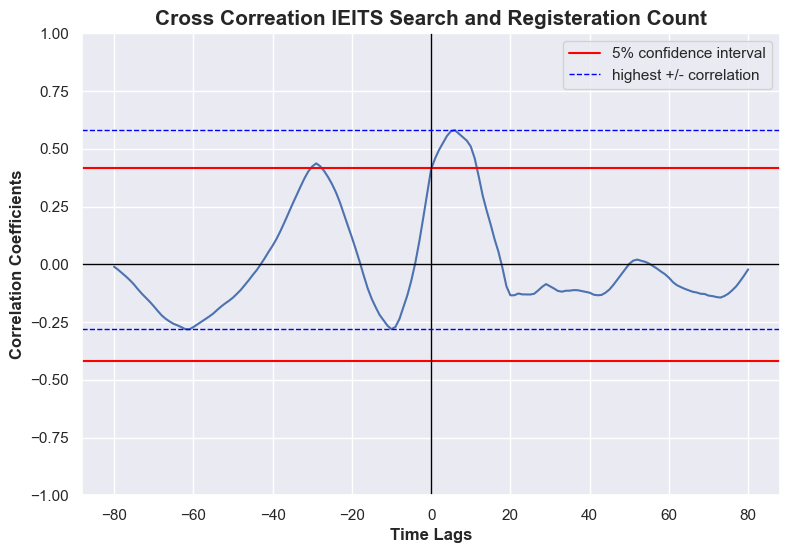

In [187]:
from scipy import signal
lags = signal.correlation_lags(len(merged['EFFR']), len(merged['INFLATION']))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, 
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, 
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation IElTS Search and Registeration Count', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', 
    fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_ielts)

In [188]:
merged['PCT_EFFR_CHANGE'] = merged['EFFR'].pct_change()
merged['PCT_INFLATION_CHANGE'] = merged['INFLATION'].pct_change()
merged.dropna(inplace=True)

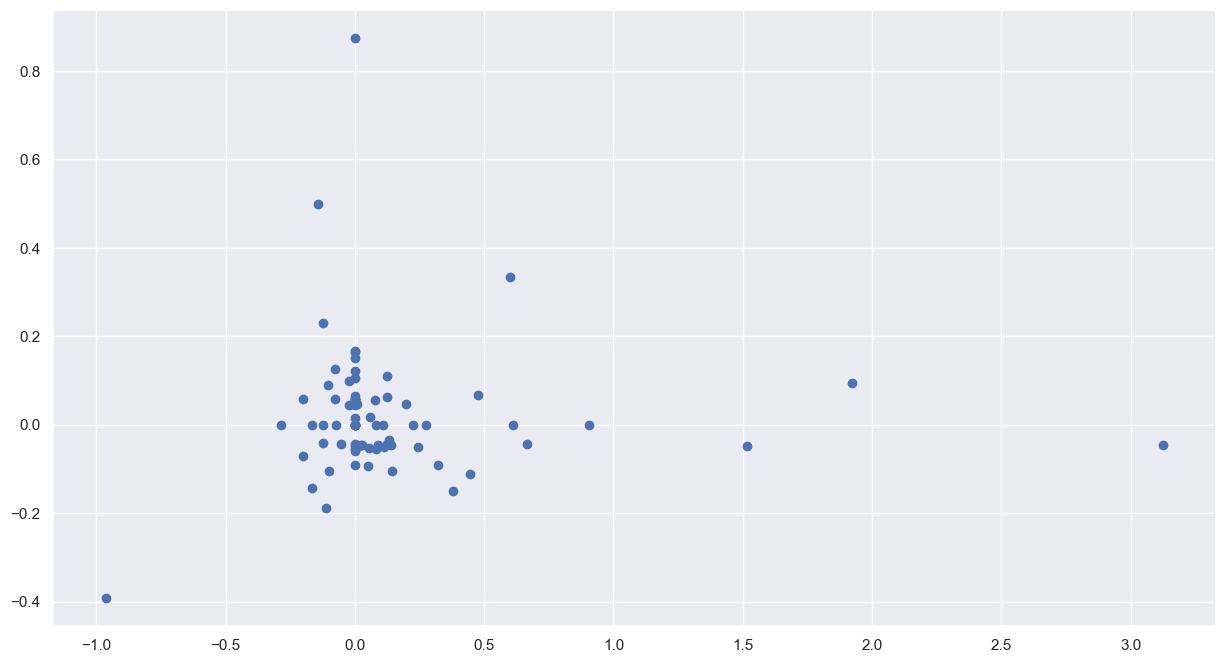

In [189]:
plt.scatter(merged['PCT_EFFR_CHANGE'], merged['PCT_INFLATION_CHANGE'])
plt.show()

<Axes: xlabel='PCT_EFFR_CHANGE', ylabel='PCT_INFLATION_CHANGE'>

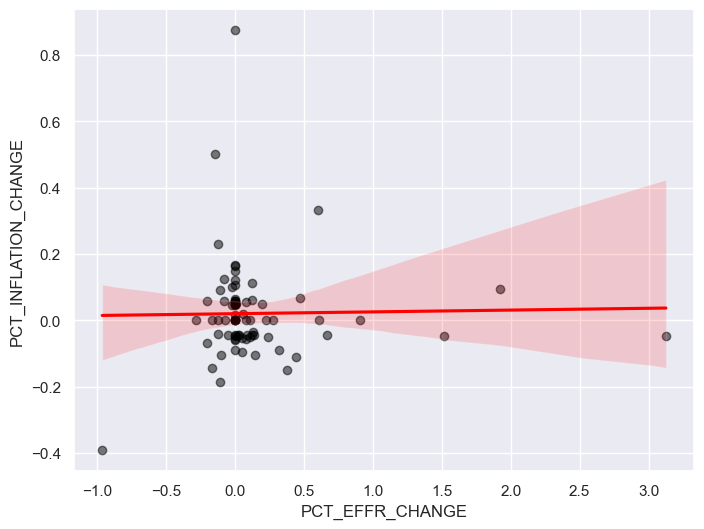

In [190]:
fig = plt.figure(figsize = (8, 6))
sns.regplot(x = merged['PCT_EFFR_CHANGE'], y = merged['PCT_INFLATION_CHANGE'],
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})

In [179]:
merged['PCT_EFFR_CHANGE'].corr(merged['PCT_INFLATION_CHANGE'])

0.019639138734078278

In [191]:
ccf_effr_inflation = ccf_values(merged['PCT_EFFR_CHANGE'], merged['PCT_INFLATION_CHANGE'])
ccf_effr_inflation

array([-2.73161365e-04,  5.00562234e-03,  1.17918182e-02,  1.21361708e-02,
        9.47686414e-03,  1.14827005e-02,  1.79207753e-02,  1.43320527e-02,
        5.71213774e-03,  6.06595604e-03,  1.09543204e-02,  5.73398270e-03,
        1.09551048e-02,  7.01301558e-03, -3.34461477e-03, -1.12655431e-02,
       -2.07954313e-02, -7.07672387e-04,  1.08897483e-02, -4.43544054e-02,
       -9.10213859e-02, -1.00814986e-01, -7.63833118e-02, -3.57613155e-02,
       -5.13573077e-02,  4.79805851e-03,  1.52872289e-02, -5.00161795e-02,
       -8.59526023e-02, -9.11004705e-04,  6.53093394e-02,  5.09322945e-02,
       -3.21552726e-03, -2.20888572e-02,  1.89263560e-02, -4.86766958e-02,
       -3.54319939e-02,  1.36219674e-01,  2.61178023e-01,  1.43574170e-02,
       -6.63028330e-02, -1.24258636e-02, -1.36675035e-02,  1.24184854e-03,
        6.72232848e-02, -1.88462595e-02, -4.16856636e-02, -6.21141752e-02,
        4.64243359e-02, -4.72165655e-03,  5.93441226e-02,  6.86966067e-02,
        1.66059912e-02,  

In [181]:
merged['PCT_EFFR_CHANGE']

1     0.000000
2     0.142857
3    -0.125000
4    -0.285714
5    -0.200000
        ...   
77    0.243506
78    0.130548
79    0.057737
80    0.054585
81    0.051760
Name: PCT_EFFR_CHANGE, Length: 81, dtype: float64

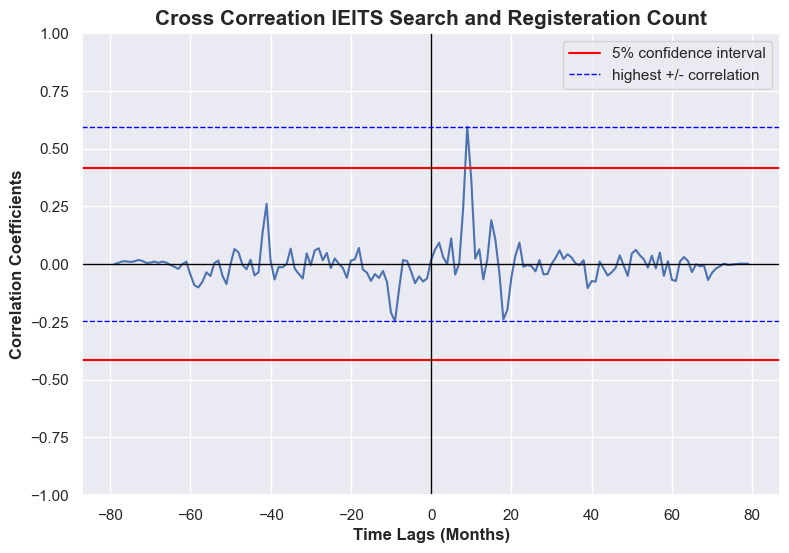

In [192]:
lags = signal.correlation_lags(len(merged['PCT_EFFR_CHANGE']), len(merged['PCT_INFLATION_CHANGE']))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation IElTS Search and Registeration Count', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags (Months)', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_effr_inflation)